In [29]:
import numpy as np
import pandas as pd
from scipy.stats import *

In [30]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [31]:
import os

In [18]:
df1 = pd.read_csv('금리_국고채3년1.csv',header=3,encoding='euc-kr',index_col='변환')

In [85]:
df_G = df1[61:-8][['원자료']]

In [86]:
df_G.index.name='일자'

In [87]:
df_G.rename(columns={'원자료':'금리'},inplace=True)

In [88]:
df_G

,금리
일자,
2016-07-01,1.21
2016-07-04,1.224
2016-07-05,1.217
2016-07-06,1.203
2016-07-07,1.208
...,...
2021-03-25,1.089
2021-03-26,1.117
2021-03-29,1.119


In [89]:
df_G.to_csv('금리_국고채3년_전처리.csv',encoding='euc-kr')

In [90]:
pd.read_csv('금리_국고채3년_전처리.csv',encoding='euc-kr',index_col='일자')

,금리
일자,
2016-07-01,1.210
2016-07-04,1.224
2016-07-05,1.217
2016-07-06,1.203
2016-07-07,1.208
...,...
2021-03-25,1.089
2021-03-26,1.117
2021-03-29,1.119


In [91]:
df2 = pd.read_csv('data/환율.csv',header=3,encoding='euc-kr',index_col='변환')

In [92]:
df_H= df2[61:-4][['원자료']]

In [93]:
df_H.index.name='일자'
df_H.rename(columns={'원자료':'달러환율'},inplace=True)

In [94]:
df_H

,달러환율
일자,
2016-07-01,"1,152.60"
2016-07-04,"1,147.50"
2016-07-05,"1,148.10"
2016-07-06,"1,153.00"
2016-07-07,"1,165.80"
...,...
2021-03-25,"1,133.50"
2021-03-26,"1,134.20"
2021-03-29,"1,131.80"


In [95]:
df_GH = pd.concat([df_G,df_H],axis=1)

In [99]:
df_GH.to_csv('data/금리,환율_전처리.csv',encoding='euc-kr')

In [97]:
for i in df_GH.columns:
    for n in range(len(df_GH[i])):
        try:
            df_GH[i][n]=df_GH[i][n].replace(',','')
        except:
            pass

In [98]:
df_GH=df_GH.astype(float)

In [100]:
%matplotlib inline
import matplotlib.pyplot as plt
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

<AxesSubplot:xlabel='일자'>

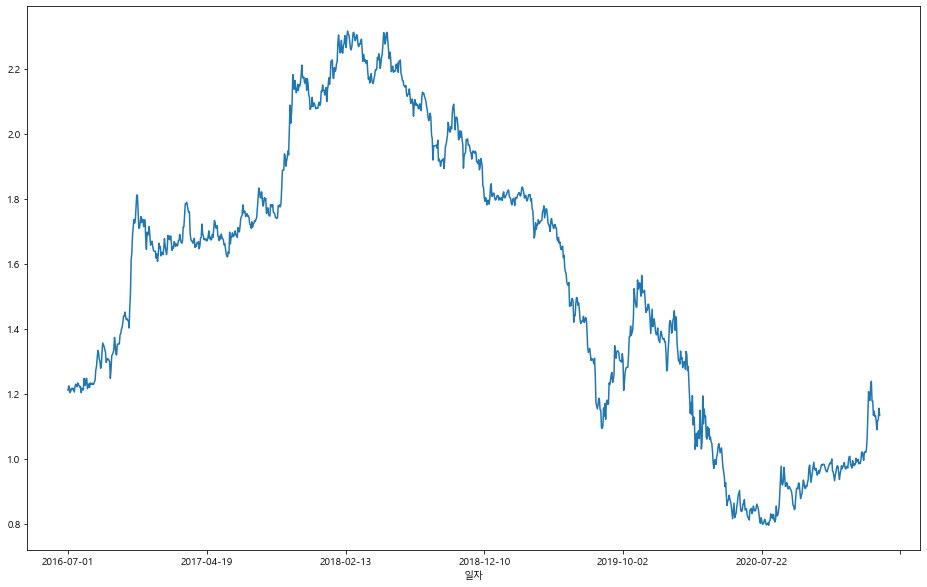

In [101]:
df_GH['금리'].plot.line(figsize=(16,10))

<AxesSubplot:xlabel='일자'>

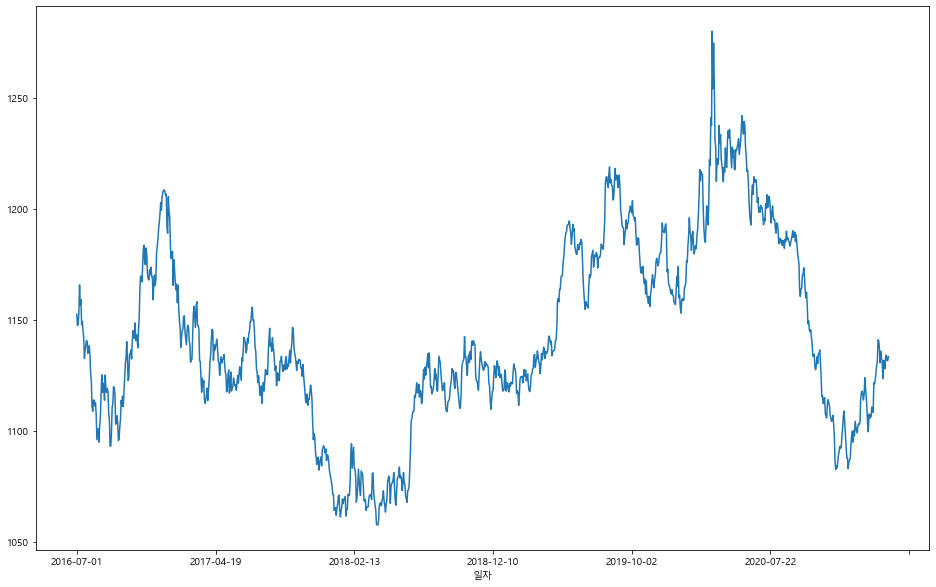

In [102]:
df_GH['달러환율'].plot.line(figsize=(16,10))